In [1]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures
from scipy.io import loadmat



In [2]:
def sigmoid_funct(z):
    return 1.0 / (1.0 + np.exp(-z))

In [3]:
def pinta_aleatorio(X):
    sample = np.random.choice(X.shape[0], 10)
    aux = X[sample, :].reshape(-1, 20)
    plt.imshow(aux.T)
    plt.axis("off")

def propagacion_hacia_delante(X, theta1, theta2):
    m = X.shape[0]
    a1 = np.hstack([np.ones([m, 1]), X])
    z2 = np.dot(a1, theta1.T)
    a2 = np.hstack([np.ones([m, 1]), sigmoid_funct(z2)])
    z3 = np.dot(a2, theta2.T)
    h = sigmoid_funct(z3)
    #return a1, z2, a2, z3, h
    return h

In [4]:
def calcAciertos(X, Y, t):
    #X = todas las X
    #Y = la Y de cada fila de X
    #t = cada fila de la matriz de thetas
    aciertos = 0
    totales = len(Y)
    dimThetas = len(t)

    for i in range(dimThetas):
        r = np.argmax(t[i]) + 1
        #print(str(r) + "------>" + str(Y[cont]))
        if(r==Y[i]):
            aciertos+=1     

    porcentaje = aciertos / totales * 100
    return porcentaje

In [5]:
def amarillo():
    
    data = loadmat ("ex3data1.mat")

    #almacenamos los datos leídos en X e y
    X = data['X']
    y = data['y']

    y = np.ravel(y) 

    weights = loadmat("ex3weights.mat")
    theta1, theta2 = weights["Theta1"], weights["Theta2"]
    
    h = propagacion_hacia_delante(X, theta1, theta2)

    result = calcAciertos(X, y, h)
    text = str(result) + "% de aciertos."
    print(text)

    plt.axis("off")
    plt.text(0,0, text)

    #Mostramos los datos finalmente
    plt.show()  

97.52% de aciertos.


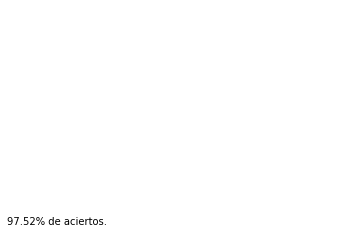

In [6]:
amarillo()